# MAchine Learning and Statistices 
# Project 2019
### Student:    David O'Brien
### Student ID: G00364766  

## Boston House Prices Dataset

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

# Describe
The Boston House Prices Dataset contains the price of houses for different neighbourhodds in Boston.  There are are number of other variables within the dataset which are outlined below:


Variable | Description
-----|------
crim | per capita crime rate by town
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
nox | nitrogen oxides concentration (parts per 10 million)
rm | average number of rooms per dwelling
age | proportion of owner-occupied units built prior to 1940
dis | weighted mean of distances to five Boston employment centres
rad | index of accessibility to radial highways
tax | full-value property-tax rate per $10,000
ptratio | pupil-teacher ratio by town
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
lstat | lower status of the population (percent)
medv | median value of owner occupied home in thousands

The first thing we will do is start exploring the dataset set to get some descriptive statistics and have a better understanding of what its about

In [5]:
# load data set and add column headers
df = pd.read_csv("bostondata.csv")

In [12]:
# lets have a look at the summary statistcs
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The above table show us that there is 506 rows of data with 14 attributes.  One of the more interesting variables here is the medv column.  This column represents the median value of homes.  In the next section We will look at comparing the value of houses based on the other variables within the dataset

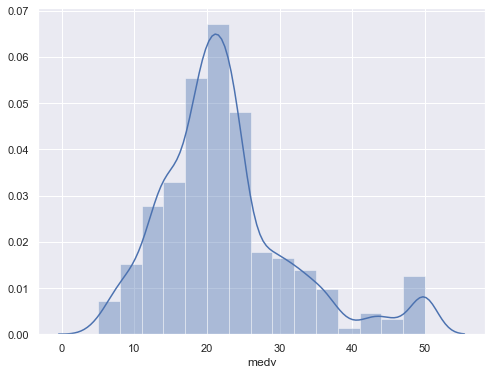

In [10]:
# plot a nicer looking graph using seaborn. Adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['medv'], bins=15)
plt.show()


From the histogram above, we can see that the mean house price is around the 22 range.  Lets take some of the variables and have a look at the pairwise realationships.  We will look at the variables "crim", "chas" "rm", and "medv" 

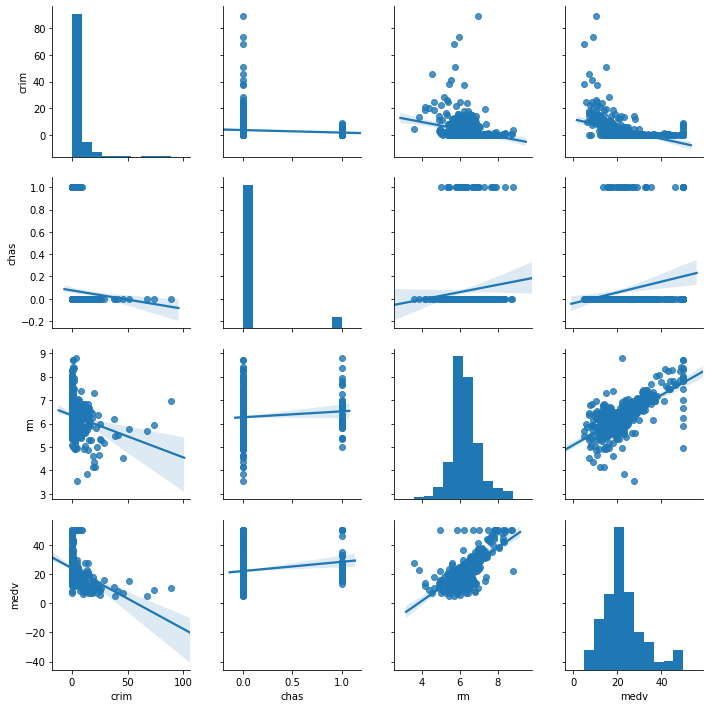

In [32]:
# plot pairwise relationships in thedataset fitting linear regression models to the scatter plots
sns.pairplot(df, vars=["crim", "chas","rm", "medv"], kind="reg") 

The bullet below gives some comments on the pairwise relationships.  From the plots above, we can see that the chas variable is binary, it is either a yes or no.  I have not included the chas variable in the points below.  This is something we will look at further in the next section to see if the value of houses is affected by whether or the not the neighbourhood bounds the Charles river.  



 - crim v rm - One would not expect a strong relationship between room numbers and crime rate, but the plot does indicate that crime rate is lower in neighbourhoods with fewer numbers of rooms per dwelling 
 - crim v medv - the plot indicates that neighbourhoods with lower value houses may have a higher crime rate
 - rm - medv - one would expect that the value of a house would increase as the room number increases and this plot indicates that relationship

# Infer
In this section, we have been asked to use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that arent.  We will try to use someo of the methods below to check this out.  The variables we are interested in for this are "chas" and "medv".
 
- Correlations
- Chi-square test
- McNemars test
- Independent t-test
- Paired sample t-test
- Welch's t-test
- Wilcoxon signed-rank test
- Linear regression
- Logistic regression
- One-way analysis of variance (ANOVA)
- Two-way/N-way ANOVA



# Correlations

The correlation matrix below indicates the correlation betweeen the different variables.  The correlation of a variable with itself if 1 i.e. they are the same.  The closer the value to one, the higher the correlations.

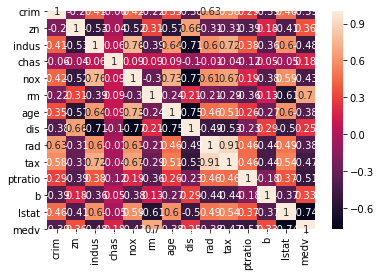

In [50]:
# adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Independent T-Test
Lets assume that there is a given difference between the means of the house prices along the river and the house prices not bounding the river. Carry out an independent T-Test to see how different they are


In [33]:
# lets look at the data in the chas and medv variables
df[['chas','medv']]

,chas,medv
0,0,24.0
1,0,21.6
2,0,34.7
3,0,33.4
4,0,36.2
...,...,...
501,0,22.4
502,0,20.6
503,0,23.9
504,0,22.0


In [34]:
#lets look at medv variable in the neighbourhoods that are along the Charles river - value is 1
df[df['chas'] == 1]['medv']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: medv, dtype: float64

In [35]:
#lets look at medv variable in the neighbourhoods that are NOT along the Charles river - value is 0
df[df['chas'] == 0]['medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 471, dtype: float64

In [36]:
#lets try an independent t-test on this data
ss.ttest_ind(df[df['chas'] == 1]['medv'], df[df['chas'] == 0]['medv'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The pvalue calculated above is very low indicating that the mean values are NOT the same.  Lets find out what the probability of seeing a t-statistic at least this extreme

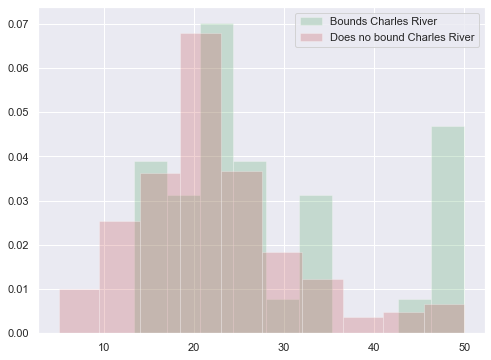

In [21]:
# plot histogram of the medv variable against the chas variable
plt.hist(df[df['chas'] == 1]['medv'], density=True, color='g', alpha = 0.25, label="Bounds Charles River")
plt.hist(df[df['chas'] == 0]['medv'], density=True, color='r', alpha = 0.25, label="Does no bound Charles River")

# display legend
plt.legend()
plt.show()

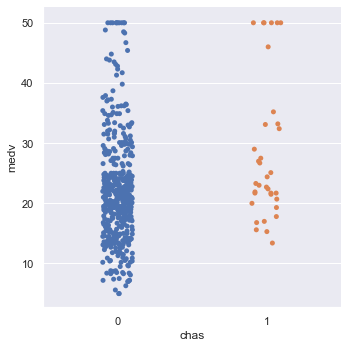

In [18]:
# lets do a plot of the data above
sns.catplot(x="chas", y="medv", data=df);

# One way Anova

Below we will attempt a one way Anova to

In [45]:
ss.f_oneway(df[df['chas'] == 1]['medv'],df[df['chas'] == 0]['medv'])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

In [ ]:
The p value


# Predict
Is there a difference between house prices between houses along the river, and houses that are not. Discuss the findings within the notebook.  Use inferential statistics to analyse this.

In [1]:
import keras as kr
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


kr.models

In [2]:
plt.rcParams['figure.figsize']=(10,10)


Create a nerual network to give the same output as the input.  The value is going to propagate through the neural network, throught the various neurons in it and at the other end, will put out the same value.  The input will go through a neuron and come out the other side.

In [3]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros')) 
# the one represents us adding 1 no. neuron to the network
# input_dim=1 represents tells us that the neural network takes 1 input, a floating point number
# activation means dont go messing with the outputs of the neurons in this layer, just leave them as they are
# kernel_initializers sets all the weights initially to one
# bias_initializer means all bias are zero

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")



In [4]:
# Create some input values.
x = np.arange(0.0, 10.0, 1)
# give each of these values in turn to the neural network. i.e. give 0 as a value to the neural network and see what it comes out with, then 1, 2.. etc.

# Run each x value through the neural network.
y = m.predict(x)


In [5]:
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [6]:
y

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

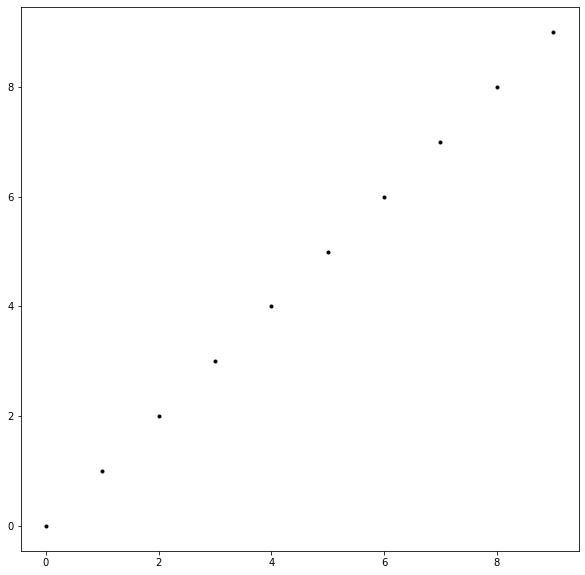

In [7]:
# Plot the values.
plt.plot(x, y, 'k.')

In [11]:

# Create a new neural network.
m = kr.models.Sequential()

# Add a two neurons in a single layer.
m.add(kr.layers.Dense(2, input_dim=1, activation="linear"))

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, activation="linear", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))

# Set the weight/bias of the two neurons.
m.layers[0].set_weights([np.matrix([2, 3]), np.array([-5, -3])])

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [12]:
# Create some input values.
x = np.arange(0.0, 10.0, 1)

# Run each x value through the neural network.
y = m.predict(x)

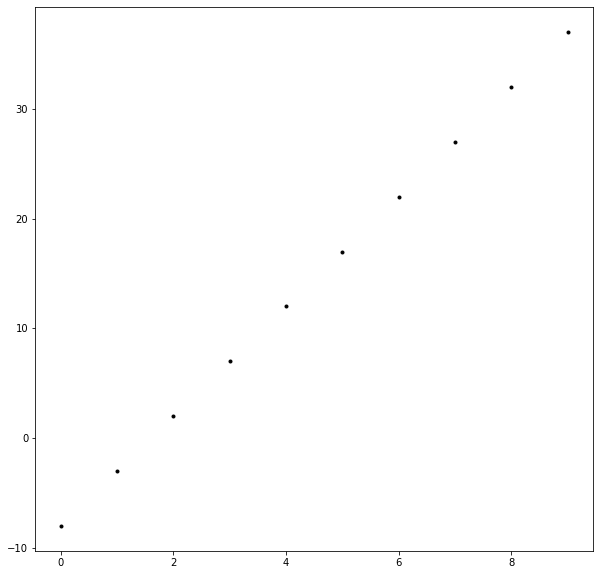

In [13]:
plt.plot(x, y, 'k.')

In [14]:

# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0, with sigmoid activation.
m.add(kr.layers.Dense(1, input_dim=1, activation="sigmoid", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))
# whatever x value you put into the sigmoid function, the output value will always be between 0 and 1, but not 0 or 1
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [15]:
# Create some input values.
x = np.arange(-10.0, 10.0, 1)

# Run each x value through the neural network.
y = m.predict(x)

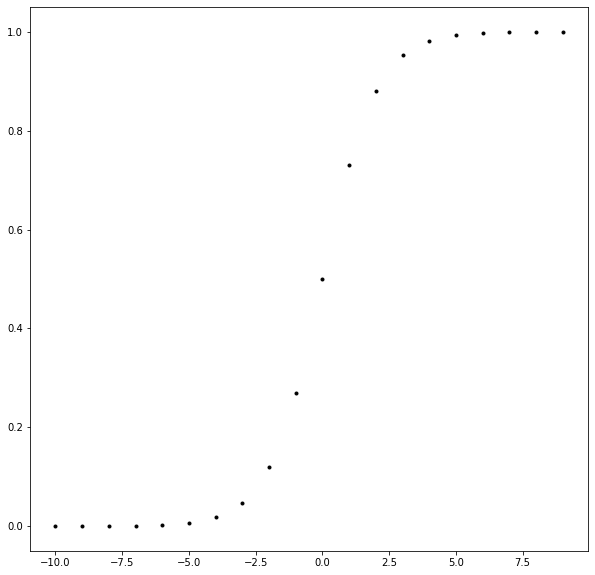

In [16]:

# Plot the values.
plt.plot(x, y, 'k.')

## References

1 - https://github.com/selva86/datasets/blob/master/BostonHousing.csv

2 - https://www.kaggle.com/c/boston-housing

3 - https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html

4 - https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

5 - https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

6 - https://pythonfordatascience.org/inferential-statistics/

7 - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

8 - https://seaborn.pydata.org/generated/seaborn.heatmap.html

9 - 

10 - 

11 - 


# ******************TEST CODE****************

In [16]:
np.polyfit(df.medv, df.crim, 1)

array([-0.36315992, 11.79653575])

In [9]:
df[0:5] # show the first five rows of data to confirm that the data has loaded correctly

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


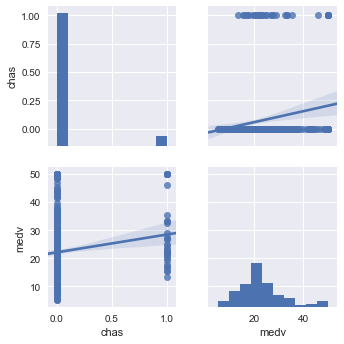

In [10]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
sns.pairplot(df, vars=["chas", "medv"], kind="reg") 

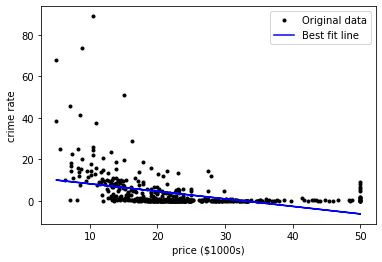

In [14]:
# Plot the best fit line
plt.plot(df.medv, df.crim, 'k.', label='Original data')
plt.plot(df.medv, -0.36315992 * df.medv + 11.79653575, 'b-', label='Best fit line')
plt.xlabel('price ($1000s)')
plt.ylabel('crime rate')
plt.legend()
plt.show()

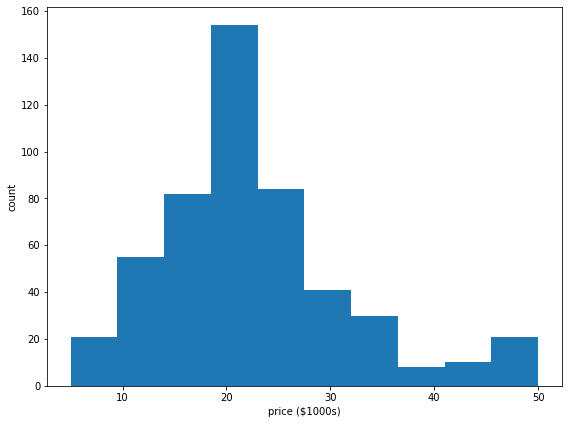

In [28]:
# Plot the distribution of the medv variable
plt.figure(figsize=(8,6))
plt.hist(df.medv,)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

Below, I have created a pair plot that details pairwise relationships in the data set.  There is a lot of information on this graph, but allows me to quickly spot any 

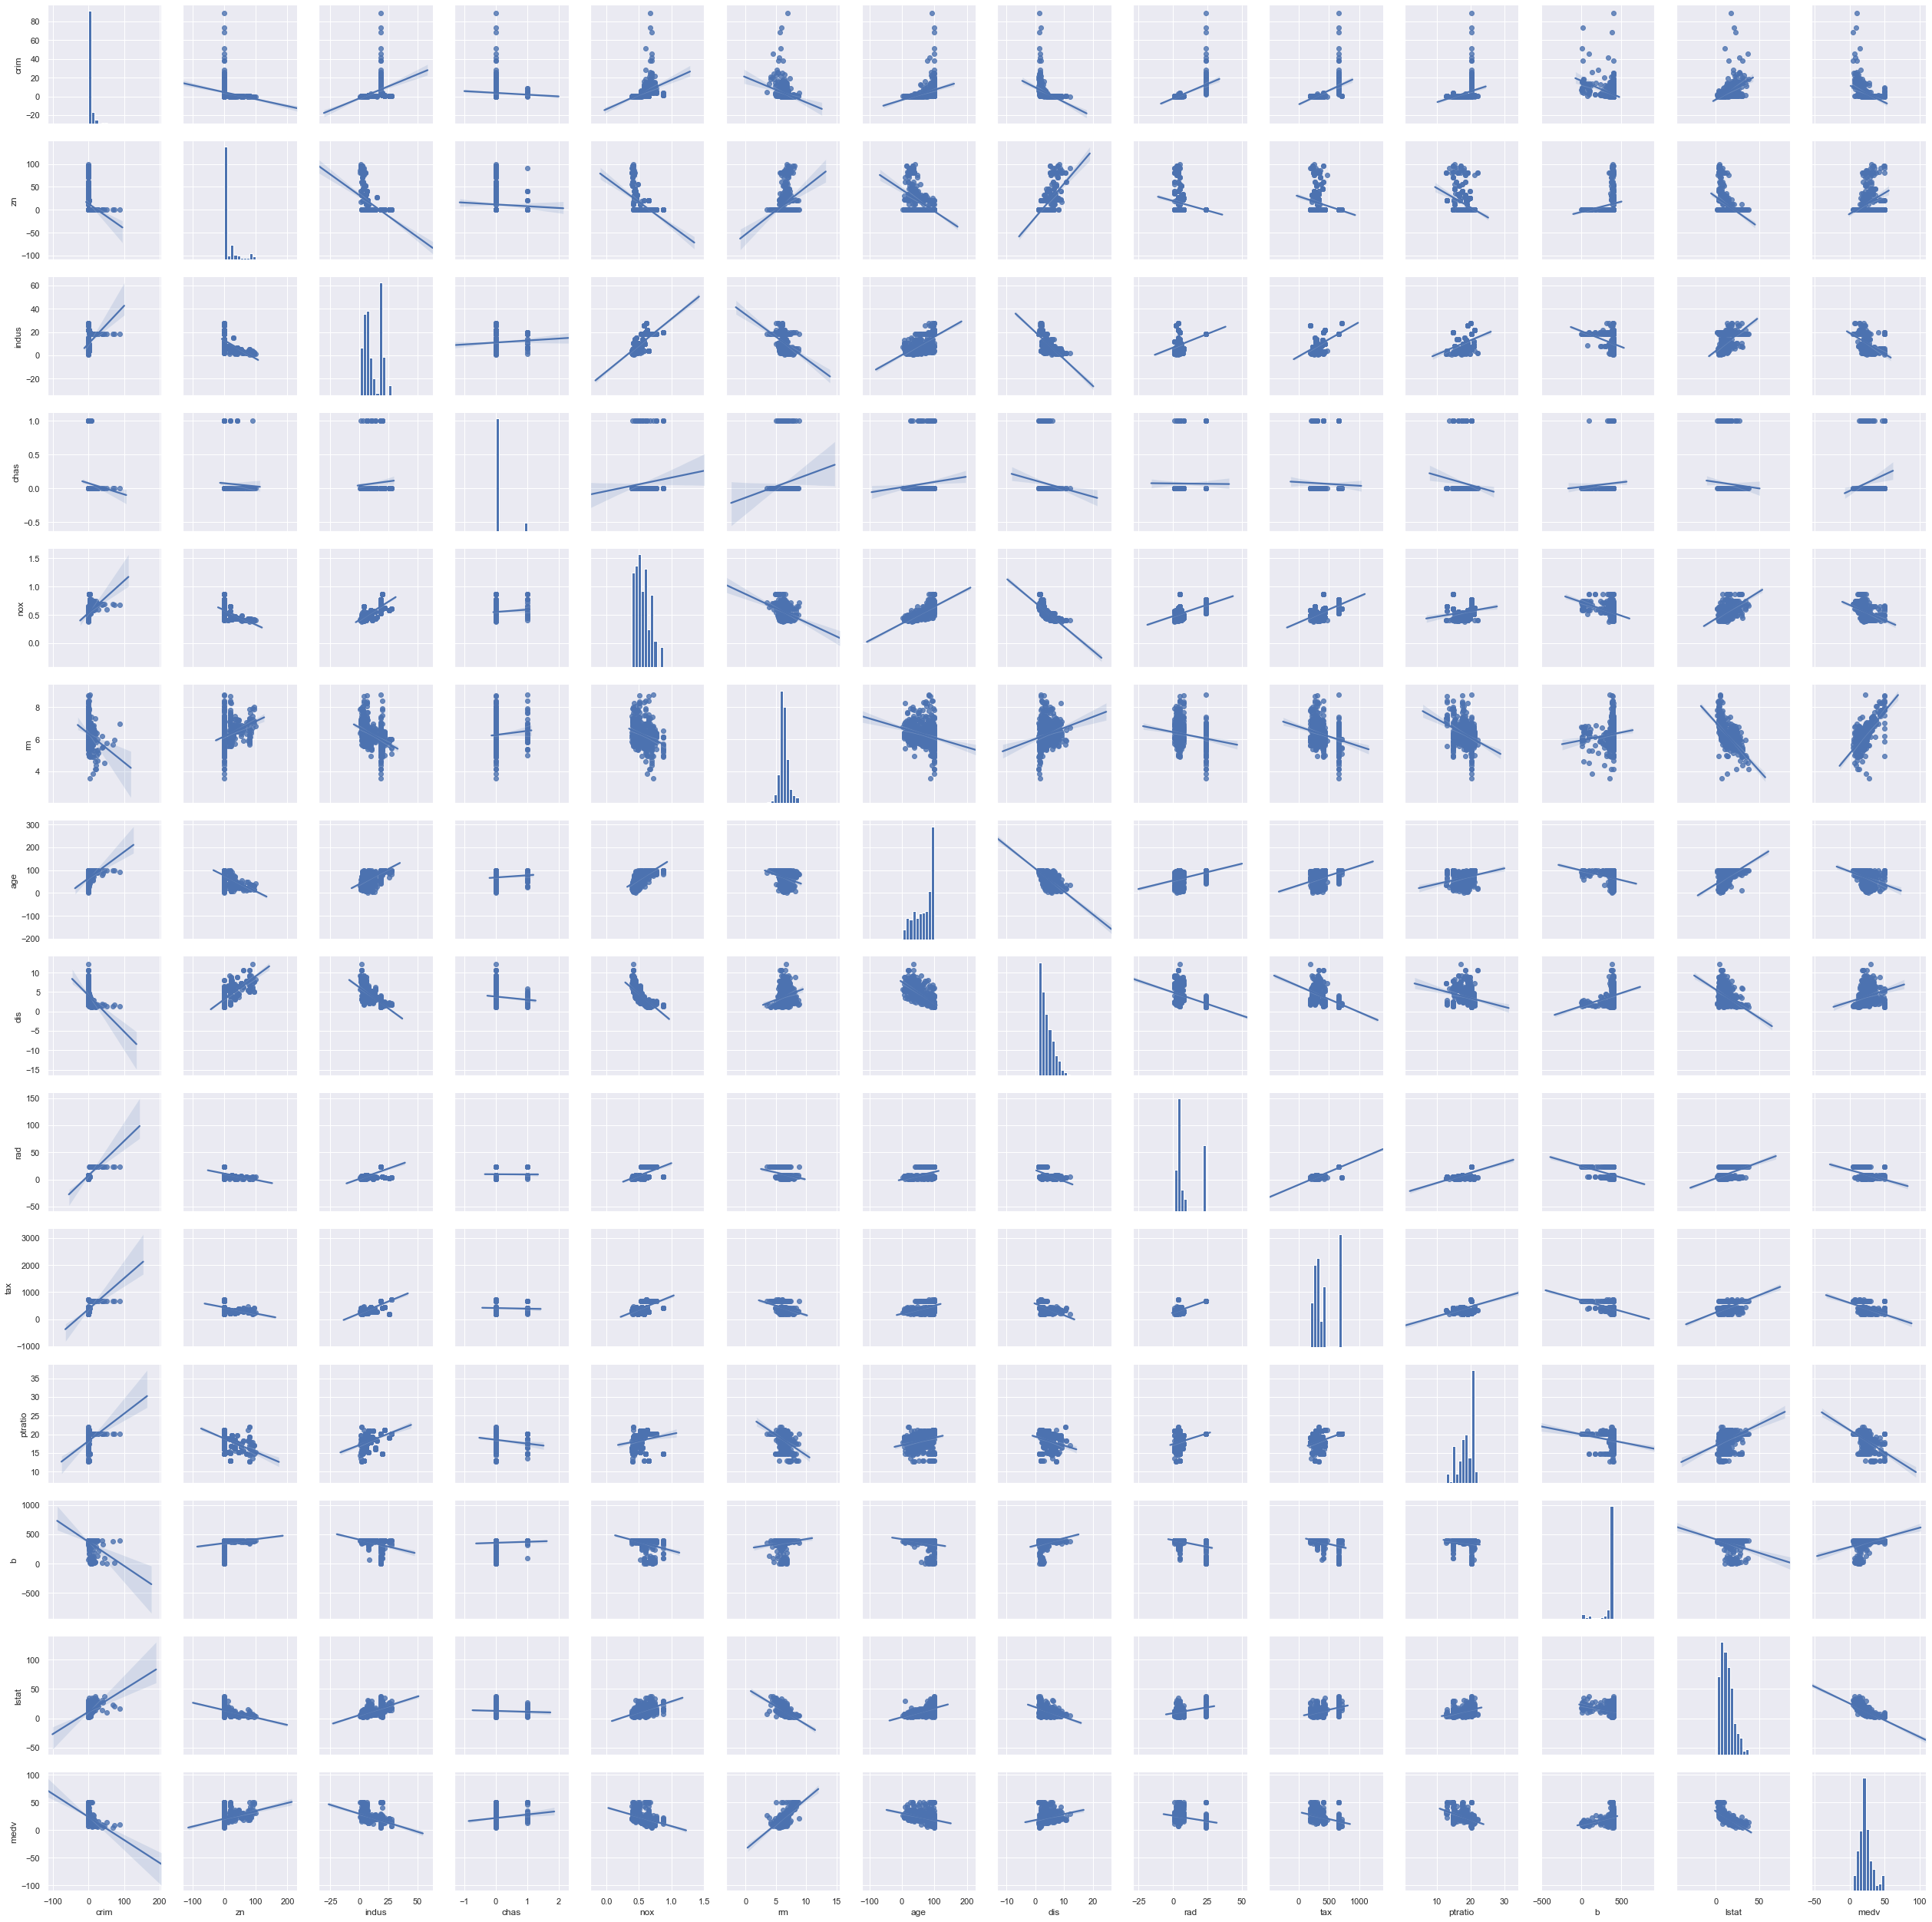

In [11]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
sns.pairplot(df, kind="reg") 